# Project 1: Investigating No-Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains information of over 100,000 medical appointments in Brazil for the month of May 2016. It is primarily collected to identify how often patients attend their booked appointments. 
It contains the following columns:
- 1. PatientId: Contains a patient's unique identification number

- 2. AppointmentId: Contains an identifier for each appointment

- 3. Gender: Recorded gender classes are male and female

- 4. ScheduledDay: The day a patient books an appointment. I later rename this column booking_day. 

- 5. AppointmentDay: The day of the scheduled appointment

- 6. Age: A patient's age

- 7. Scholarship: This column records whether a patient is enrolled on the now defunct Brazilian family welfare scheme, Bolsa Família. The Scheme was aimed at reducing poverty in Brazil by giving financial aid to poor families under conditions such as enrolling their children in school and getting vaccinated. Critics of the scheme, amongst many things, argued that it increased the rate of alcoholism amongst participating families. I later rename this to on_bolsa. The values in this column are 1 and 0 representing whether a patient attended or did not attend their appointment respectively. 

- 8. Hipertension: Indicates whether or not a patient is hypertensive. 1 if true and 0 if not. 

- 9. Diabetes: Indicates whether or not a patient is diabetic. 1 if true and 0 if not. 

- 10. Alcoholism: Indicates whether or not a patient is an alocoholic. 1 if true and 0 if not. 

- 11. Handcap: Indicates whether a patient is disabled or not. 1 if a patient has at least one disability and  0 if the patient has none. 

- 12. SMS_received: Indicates whether a patient received one or more messages. 1 if true and 0 if not. 

- 13. No_Show: Indicates whether a patient attended their appointment or not. No means they showed up, while Yes means they did not. I later modify these values. 

### Questions

1. I have a keen interest in disability related issues, so, the disability data captured my attention instantly. I want to find out if the rate of attendance among disabled patients, compared to patients without disabilities. Do disabled patients miss appointments more or do they show up more? I'll also be looking for any factors that might contribute to the answer I get, such as receiving SMS and the length of time between booking day and appointment day. 

2. I want to find out if there is any statistical evidence that people on the bolsa familia programme are more prone to alcoholism. Is there a correlation between alocoholism and being on bolsa? 
Additionally, I will check whether being on the bolsa familia programme encourages patients to show up for appointments or not. 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook') # customising visualisations 
sns.set_style('darkgrid')
%matplotlib inline

<a id='cleaning'></a>
## Data Cleaning





In [2]:
# loading data into Pandas
df = pd.read_csv('noshowappointments_may_2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# checking what columns are in the dataset, their data types and the exact number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.shape

(110527, 14)

There are no missing values.

In [5]:
# checking descriptive statistics of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:

# Having itemised the research questions I want to answer I will now drop columns which are not relevant to my analysis.
df.drop(columns=['PatientId', 'AppointmentID', 'Neighbourhood', 'Hipertension', 'Diabetes', 'Gender', 'Age'], axis=1, inplace=True)


In [7]:
df.head(1)

,ScheduledDay,AppointmentDay,Scholarship,Alcoholism,Handcap,SMS_received,No-show
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,0,0,0,0,No


In [8]:
# renaming columns. 
# first, I will change all columns to lowercase for consistency.
# secondly, I am changing some of the column names for clarity and understanding. 
df.rename(columns={'ScheduledDay':'booking_day', 'AppointmentDay':'appointment_day', 
                   'Scholarship':'on_bolsa',
                   'Alcoholism':'alcoholism', 'Handcap':'disability', 'SMS_received':'received_sms', 'No-show':'showed_up'}, inplace=True)
         

In [9]:
# inspecting my new column names
df.head(1)

,booking_day,appointment_day,on_bolsa,alcoholism,disability,received_sms,showed_up
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,0,0,0,0,No


In [10]:
# converting booking day and appointment day from string datatype to datetime object for more useful analysis.

df['booking_day'] = df['booking_day'].astype('datetime64')
df['appointment_day'] = df['appointment_day'].astype('datetime64')

In [11]:
df[['booking_day', 'appointment_day']]

,booking_day,appointment_day
0,2016-04-29 18:38:08,2016-04-29
1,2016-04-29 16:08:27,2016-04-29
2,2016-04-29 16:19:04,2016-04-29
3,2016-04-29 17:29:31,2016-04-29
4,2016-04-29 16:07:23,2016-04-29
...,...,...
110522,2016-05-03 09:15:35,2016-06-07
110523,2016-05-03 07:27:33,2016-06-07
110524,2016-04-27 16:03:52,2016-06-07
110525,2016-04-27 15:09:23,2016-06-07


In [12]:
# separating the date generated from the datetime object in booking_day into a different column from the timestamps generated. 
df['booking_date'] = df['booking_day'].dt.date

Having the date fields as string datatypes prevents me from performing arithmetic or statistical operations on the data. As a dateobject I will be able to obtain the difference between between appointment day and booking day to know, for every patient, how many days passed between their booking and appointment. 

In [13]:
# dropping the original booking_day column as I have already extracted the necessary information from it. 
df.drop(columns=['booking_day'], inplace=True)

In [14]:
# renaming booking_date column to booking_day

df.rename(columns={'booking_date':'booking_day'}, inplace=True)

In [15]:
# rearranging columns to bring_booking day nearer to appointment day

df = df[['booking_day', 'appointment_day', 'on_bolsa',
        'alcoholism', 'disability', 'received_sms', 'showed_up']]

In [16]:
# inspecting my changes
df.head(1)

,booking_day,appointment_day,on_bolsa,alcoholism,disability,received_sms,showed_up
0,2016-04-29,2016-04-29,0,0,0,0,No


In [17]:
# inspecting the booking_day and appointment_day columns
df[['booking_day', 'appointment_day']].head()

,booking_day,appointment_day
0,2016-04-29,2016-04-29
1,2016-04-29,2016-04-29
2,2016-04-29,2016-04-29
3,2016-04-29,2016-04-29
4,2016-04-29,2016-04-29


In [18]:
# checking datatype of booking_day column
df.booking_day.dtype

dtype('O')

In [19]:
# checking datatype of appointment_day column
df.appointment_day.dtype

dtype('<M8[ns]')

In [20]:
# convert booking_day to datetime64 for compatibility with appointment_day column
df['booking_day'] = df['booking_day'].astype('datetime64')
df.booking_day.dtype

dtype('<M8[ns]')

In [21]:
# subtracting booking day from appointment day to find number of days elapsed between booking and appointment
# assigning difference to a new column, days_elapsed
df['days_elapsed'] = df['appointment_day']-df['booking_day']
df.days_elapsed.describe()

count                        110527
mean     10 days 04:24:31.828602965
std      15 days 06:07:11.673762786
min               -6 days +00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: days_elapsed, dtype: object

There are some erroneous entries if the min days elapsed is a negative number. Booking always comes before or on the same day as appointment but never after. I will drop these erroneous columns. 

In [22]:
# querying the dataframe to find the rows with negative days_elapsed values
# inv = investigating
inv = df.query('days_elapsed >= days_elapsed.min()' and 'days_elapsed < days_elapsed.quantile(0.25)')
inv

,booking_day,appointment_day,on_bolsa,alcoholism,disability,received_sms,showed_up,days_elapsed
27033,2016-05-10,2016-05-09,0,0,1,0,Yes,-1 days
55226,2016-05-18,2016-05-17,0,0,1,0,Yes,-1 days
64175,2016-05-05,2016-05-04,0,0,0,0,Yes,-1 days
71533,2016-05-11,2016-05-05,0,0,0,0,Yes,-6 days
72362,2016-05-04,2016-05-03,0,0,0,0,Yes,-1 days


In [23]:
df.drop(inv.index, inplace=True)

In [24]:
# checking to see if these incorrect rows have been dropped. 
# now_inv = investigating
now_inv = df.query('days_elapsed >= days_elapsed.min()' and 'days_elapsed < days_elapsed.quantile(0.25)')
len(now_inv)

0

I will change the yes and no in showed_up to integers 0 and 1, with '1' representing a patient showing up and '0' meaning that the patient did not show up. This will enable me find any correlations in the column and also facilitiate boolean operations which I will need to create masks for exploratory data analysis. 

In [25]:
# checking value counts of the showed_up column. 

df.showed_up.value_counts()

No     88208
Yes    22314
Name: showed_up, dtype: int64

In [26]:
# write a function to change the values
def change_values(value):
    new_value = int
    if value == 'No':
        new_value = 1
    else:
        new_value = 0
    return new_value


In [27]:
df['showed_up'] = df['showed_up'].apply(change_values)

In [28]:
df.showed_up.value_counts()

1    88208
0    22314
Name: showed_up, dtype: int64

In [29]:
df.showed_up.dtype

dtype('int64')

In [30]:
# checking for correlation in the data
df.corr()

,on_bolsa,alcoholism,disability,received_sms,showed_up
on_bolsa,1.000000,0.035020,-0.008554,0.001184,-0.029167
alcoholism,0.035020,1.000000,0.004668,-0.026153,0.000180
disability,-0.008554,0.004668,1.000000,-0.024096,0.006289
received_sms,0.001184,-0.026153,-0.024096,1.000000,-0.126505
showed_up,-0.029167,0.000180,0.006289,-0.126505,1.000000


The correlation between the variables is quite low. A possible explanation is the size difference between the cell values. Age is the only proper numerical data. Other values such as on_bolsa, showed_up and alcoholism are boolean data that have been converted to numerical format for more ease of operation; they are hence not true numerical data that can generate accurate correlation. 


In [31]:
df.head()

,booking_day,appointment_day,on_bolsa,alcoholism,disability,received_sms,showed_up,days_elapsed
0,2016-04-29,2016-04-29,0,0,0,0,1,0 days
1,2016-04-29,2016-04-29,0,0,0,0,1,0 days
2,2016-04-29,2016-04-29,0,0,0,0,1,0 days
3,2016-04-29,2016-04-29,0,0,0,0,1,0 days
4,2016-04-29,2016-04-29,0,0,0,0,1,0 days


<a id='eda'></a>
## Exploratory Data Analysis



### Question 1: Does having a disability influence whether a patient shows up or not?

In [32]:
# inspect the datatype of the disability column
df.disability.dtype

dtype('int64')

In [33]:
#looking at the value counts
df['disability'].value_counts()

0    108283
1      2040
2       183
3        13
4         3
Name: disability, dtype: int64

In [34]:
# looking for the relationship between disability and turn_up using the showed and no_show masks


showed = df.showed_up == True
no_show = df.showed_up == False

In [35]:
#creating a mask for disabled and non-disabled patients.
disabled = df.disability > 0
not_disabled = df.disability == 0



In [36]:
# total number of disabled people
disabled_count = len(df[disabled])
disabled_count

2239

In [37]:
# total number of non disabled people
not_disabled_count = len(df[not_disabled])
not_disabled_count

108283

In [38]:
# calculating percentage of disabled and non-disabled patients in the dataset.
total_count = disabled_count + not_disabled_count
percent_disab = (disabled_count/ total_count) * 100
percent_not_disab = (not_disabled_count/ total_count) * 100


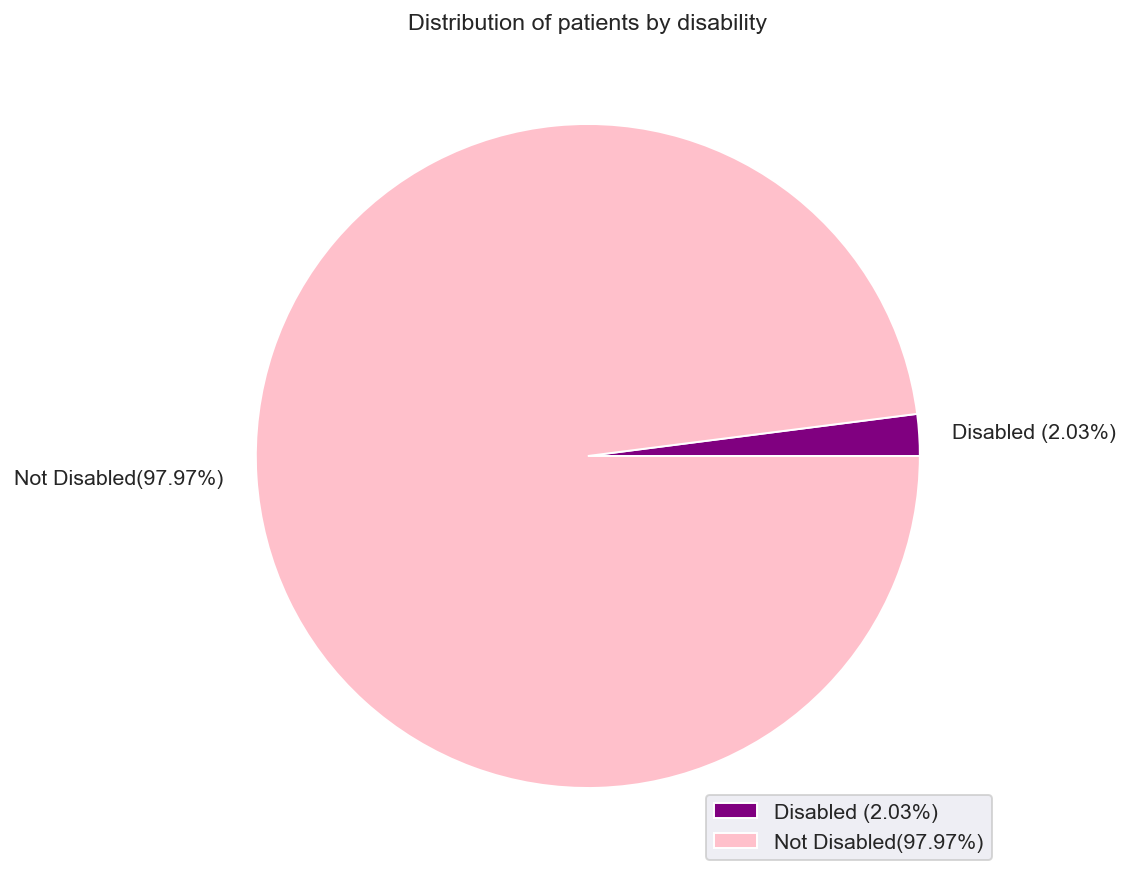

<Figure size 1120x1120 with 0 Axes>

In [143]:
# creating a pie chart for distribution of patients by disability.
# reference: https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
# reference: https://www.tutorialspoint.com/how-can-i-generate-more-colors-on-a-pie-chart-in-matplotlib

x = [f'Disabled ({round(percent_disab, 2)}%)', f'Not Disabled({round(percent_not_disab, 2)}%)']
y = [percent_disab, percent_not_disab]
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['figure.dpi'] = 140
colors = ['purple', 'pink']
plt.pie(y, labels=x, colors=colors)

plt.legend(x, loc='lower right')
plt.title('Distribution of patients by disability')
plt.axis=('equal')
plt.tight_layout()
plt.show()
plt.savefig('Distribution_of_Patients_By_Disability.jpg')



Observation: So far, there are significantly less disabled people in the dataset. To get an accurate representation of the rate of turn up between the two groups, I'll have to do a proportion to know which group had a higher rate of showing up. I'll compute this by dividing number of show_ups by total number of people for each group. 

In [40]:
# proportion calculator: takes a numerator and a denominator, multiplies product by 100 to return the proportion in percentage. 
def proportion_calc(num, denom):
    x = (num/denom) * 100
    return x



In [41]:
# proportion of disabled patients who showed up
num_d = len(df[disabled][showed])
denom_d = len(df[disabled])
prop_d = proportion_calc(num_d, denom_d)
prop_d

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/1527039296.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_d = len(df[disabled][showed])


81.91156766413577

In [42]:
# proportion of non-disabled patients who showed up
num_nd = len(df[not_disabled][showed])
denom_nd = len(df[not_disabled])
prop_nd = proportion_calc(num_nd, denom_nd)
prop_nd

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/3875808267.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_nd = len(df[not_disabled][showed])


79.76690708606152

In [43]:
# calculating proportion of disabled and non-disabled patients who did not show up.
no_show_prop_d = proportion_calc(len(df[disabled][no_show]),len(df[disabled]))
no_show_prop_nd = proportion_calc(len(df[not_disabled][no_show]), len(df[not_disabled]))


/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/1679295002.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_show_prop_d = proportion_calc(len(df[disabled][no_show]),len(df[disabled]))
/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/1679295002.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_show_prop_nd = proportion_calc(len(df[not_disabled][no_show]), len(df[not_disabled]))


In [160]:
no_show_prop_nd

20.233092913938474

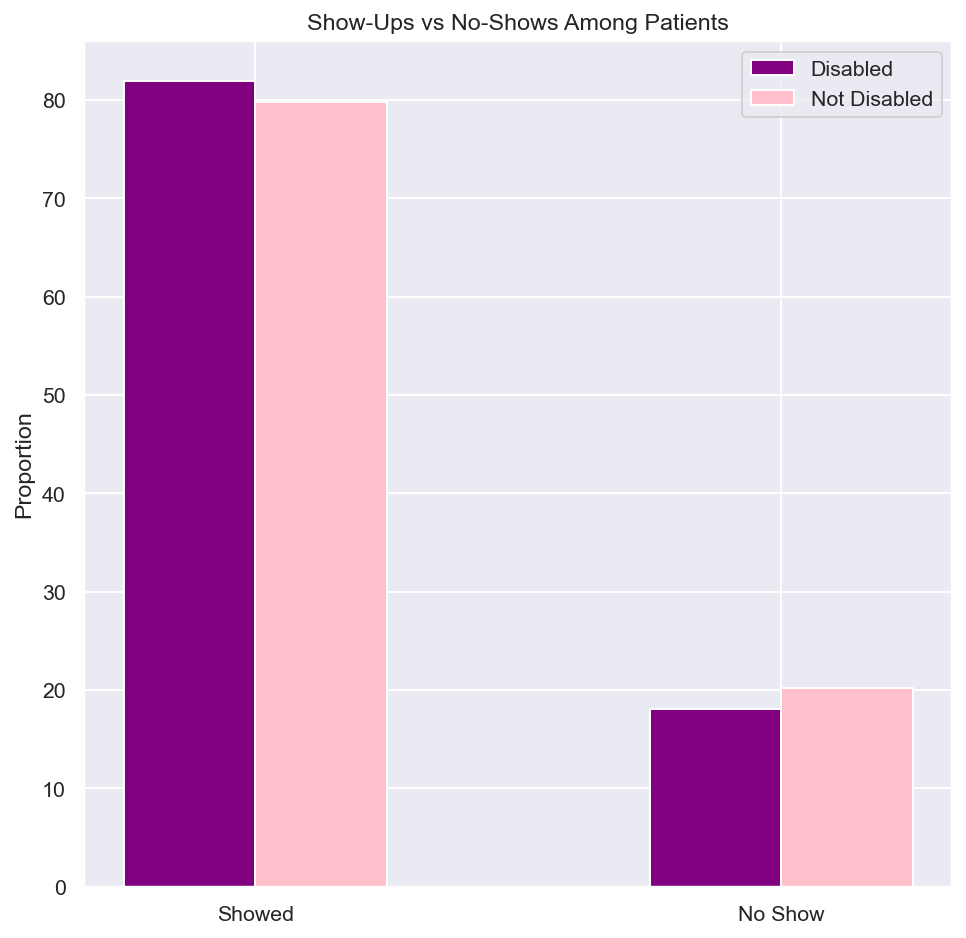

In [144]:
# sources: https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
# sources: https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html
# sources: https://seaborn.pydata.org/tutorial/aesthetics.html
labels = ['Showed', 'No Show']
dis_bar = [prop_d, no_show_prop_d]
no_dis_bar = [prop_nd, no_show_prop_nd]

label_loc = np.arange(len(labels))
width = 0.25
rects1 = plt.bar(label_loc - width/2, dis_bar, color='purple', alpha=1, label='Disabled', width=width)
rects2 = plt.bar(label_loc + width/2, no_dis_bar, color='pink', alpha=1, label='Not Disabled', width=width)

# title and labels

plt.ylabel('Proportion')
plt.title('Show-Ups vs No-Shows Among Patients')

plt.xticks(label_loc, labels)

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["figure.dpi"] = 140


# legend
plt.legend()

 There is a higher rate of show up amongst disabled patients, while patients without disabilities had a higher no show rate. This is despite disabled people comprising only 2% percent of the data. Why is this?
I think that receiving sms and having a shorter time between booking and appointment might be contributing factors. 
First, I will check the number of disabled patients who received sms compared to the number of non disabled people. 
Next, I will also check the average days elapsed between a disabled person and a non-PWD (short for persons with disabilities) 

- Exploring the connection between receiving sms and showing up amongst disabled and non-disabled patients 

In [45]:
# creating masks for received sms or not
df.received_sms.value_counts()
sms = df.received_sms == True
no_sms = df.received_sms == False

In [46]:
# % of disabled population who received sms
d_sms= len(df[sms][disabled])/len(df[disabled]) * 100
d_sms

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/1089687889.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d_sms= len(df[sms][disabled])/len(df[disabled]) * 100


23.939258597588207

I stopped using my proprtion calculator because when the code ran up to this point it started throwing an error of float object not being callable even after it had worked in previous cells. I tried in vain to find a solution, so, I decided to omit the function altogether and just compute the proportion values directly. 

In [47]:
# % of non-disabled population who received sms
nd_sms= len(df[sms][not_disabled])/len(df[not_disabled]) * 100
nd_sms

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/158939645.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_sms= len(df[sms][not_disabled])/len(df[not_disabled]) * 100


32.27284061209977

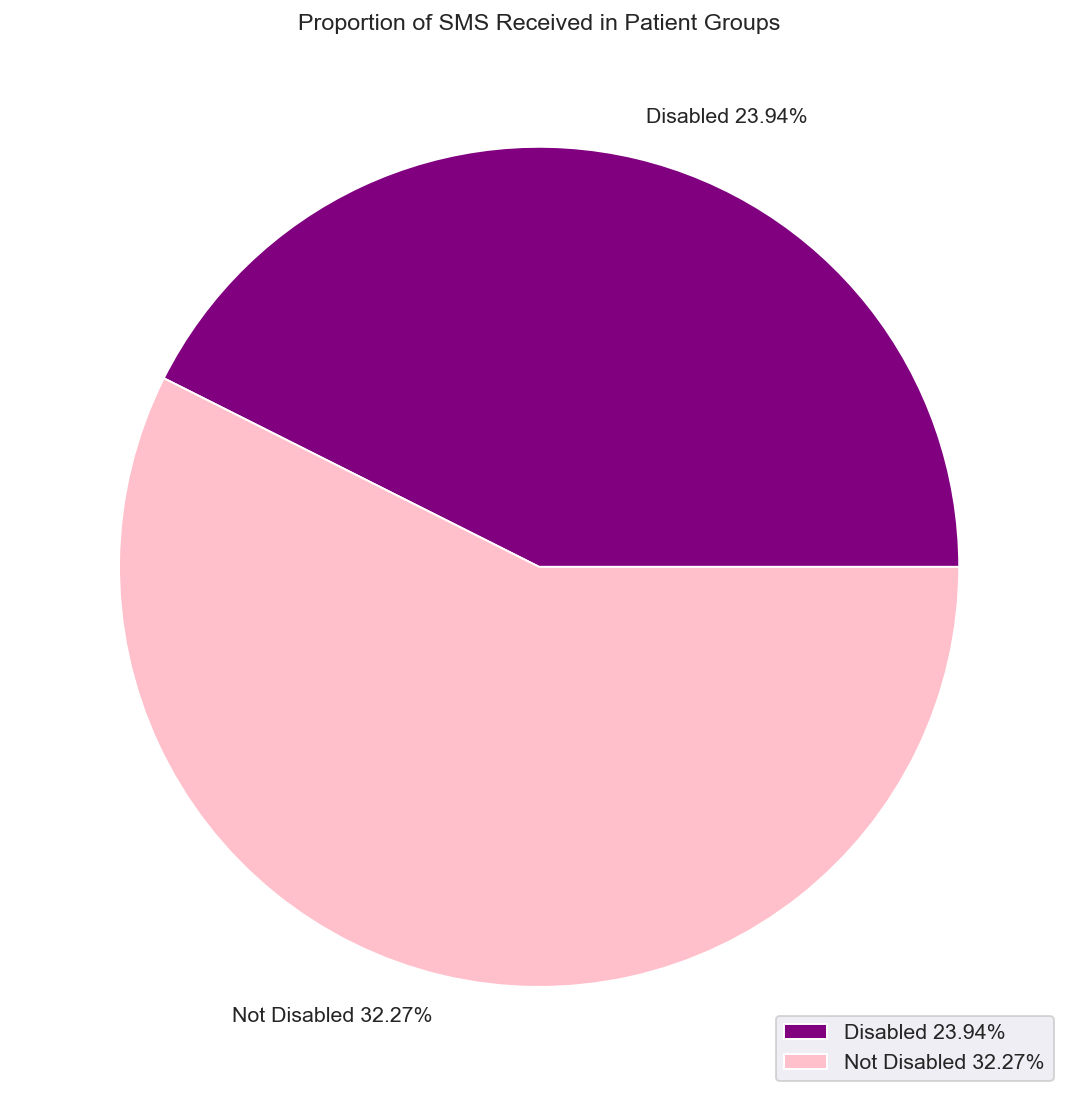

In [145]:
x = [f'Disabled {round(d_sms, 2)}%', f'Not Disabled {round(nd_sms, 2)}%']
y = [d_sms, nd_sms]
fig = plt.figure(figsize=(8, 8))
fig.set_dpi(140)
colors = ['purple', 'pink']
plt.pie(y, labels=x, colors=colors)

plt.legend(x, loc='lower right')
plt.title('Proportion of SMS Received in Patient Groups')
plt.axis=('equal')
plt.tight_layout()
plt.show()

To my surprise, a higher percentage of non-disabled people received text messages. 
Next, I will check the rate of attendance and no-shows among disabled and non-disabled patients who received sms.

In [49]:

d_sms_showed= proportion_calc(len(df[sms][showed][disabled]), len(df[showed][disabled]))
d_sms_showed
# 21% of disabled patients who showed received sms

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/1690901388.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d_sms_showed= proportion_calc(len(df[sms][showed][disabled]), len(df[showed][disabled]))


21.864776444929117

In [50]:
nd_sms_showed = proportion_calc(len(df[sms][showed][not_disabled]), len(df[showed][not_disabled]))
nd_sms_showed
# 29% of non disabled patients who showed received sms

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/39734348.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_sms_showed = proportion_calc(len(df[sms][showed][not_disabled]), len(df[showed][not_disabled]))


29.28774862805937

In [51]:
d_sms_no_show = proportion_calc(len(df[sms][no_show][disabled]), len(df[no_show][disabled]))
d_sms_no_show
# 33% of disabled patients who did not show up received SMS. 

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/3201059815.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d_sms_no_show = proportion_calc(len(df[sms][no_show][disabled]), len(df[no_show][disabled]))


33.33333333333333

In [52]:

nd_sms_no_show = proportion_calc(len(df[sms][no_show][not_disabled]), len(df[no_show][not_disabled]))
nd_sms_no_show
# 44% of non-disabled patients who did not show up received SMS.

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/153213763.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_sms_no_show = proportion_calc(len(df[sms][no_show][not_disabled]), len(df[no_show][not_disabled]))


44.04126158199826

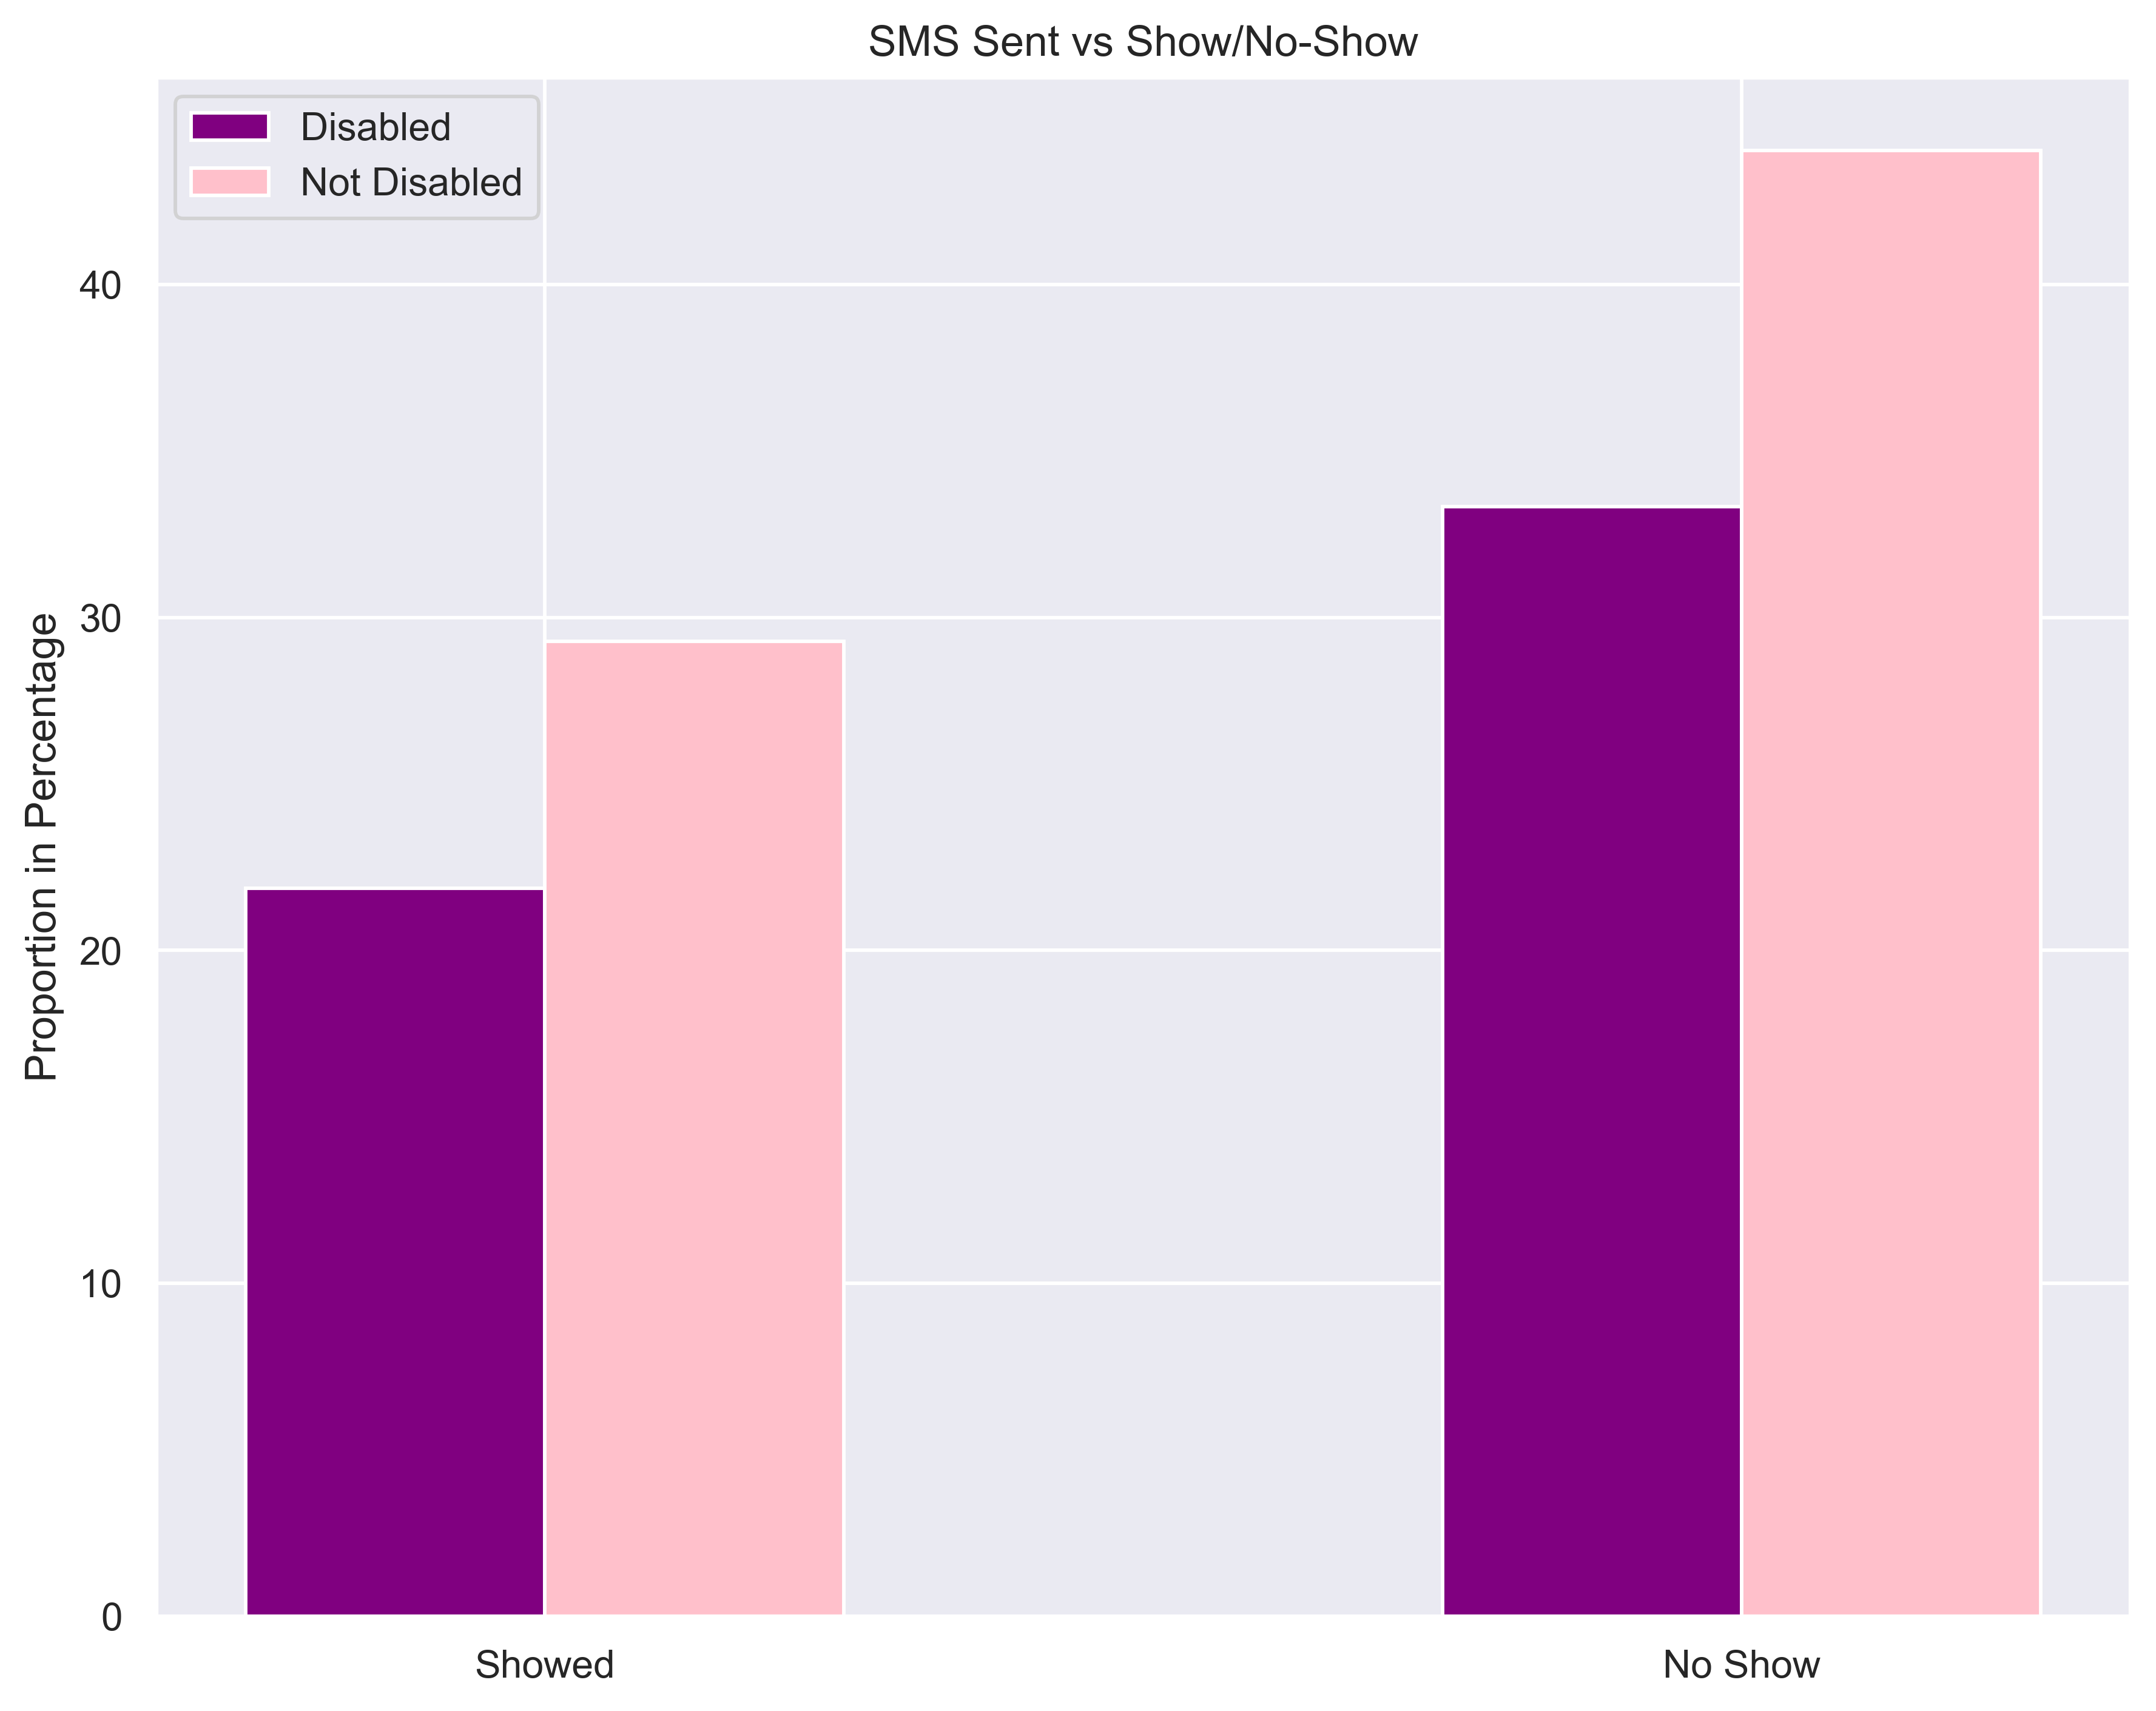

In [152]:
labels = ['Showed', 'No Show']
dis_bar = [d_sms_showed, d_sms_no_show]
no_dis_bar = [nd_sms_showed, nd_sms_no_show]

label_loc = np.arange(len(labels))
width = 0.25
rects1 = plt.bar(label_loc - width/2, dis_bar, color='purple', alpha=1, label='Disabled', width=width)
rects2 = plt.bar(label_loc + width/2, no_dis_bar, color='pink', alpha=1, label='Not Disabled', width=width)

# title and labels
plt.ylabel('Proportion in Percentage')
plt.title('SMS Sent vs Show/No-Show')

plt.xticks(label_loc, labels)

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams['figure.dpi'] = 140
# legend
plt.legend()

In [54]:
df.received_sms.value_counts()

0    75040
1    35482
Name: received_sms, dtype: int64

Receiving SMS does not appear to contribute the higher rate of show up for disabled people, neither was it the case for non-disabled people. It seems that patients who receive sms are more likely to miss their appointment than they are to show up. This is likely related to the next point in my analysis- the number of days elapsed between booking day and appointment day, as, patients who have longer days in-between are more likely to receive text messages. 

> **Limitations to this observation**: I have only analysed SMS received, I did not analyse the segment of the patients who did not receive SMS.

- Exploring the connection between number of days elapsed and show/no-show rate

In [55]:
#converting days_elapsed to integer
#first converting to a string, then will extract the digits and convert to int
df.days_elapsed = df.days_elapsed.astype(str)
df.days_elapsed.describe()


count     110522
unique       129
top       0 days
freq       38563
Name: days_elapsed, dtype: object

In [56]:
# the regular expression r'(\d+)' in this method extracts the digits in a string and astype() converts the string into an int. Source: https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column
df.days_elapsed = df.days_elapsed.str.extract(r'(\d+)', expand=True).astype(int)


In [57]:
# checking that days_elapsed is now an int
df.days_elapsed.dtype

dtype('int64')

In [58]:
# checking basic statistics for days_elapsed column
df.days_elapsed.describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_elapsed, dtype: float64

In [59]:
# create masks for days_elapsed
same_day = df.days_elapsed == 0
_1_to_7_days = (df.days_elapsed > 0) & (df.days_elapsed <= 7)
_more_than_7_days = df.days_elapsed > 7



Here, I'll be checking the proportion of disabled and non-disabled patients who received same day appointments. 

In [60]:
not_disab_same_day = proportion_calc(len(df[not_disabled][same_day]), len(df[not_disabled]))
not_disab_same_day

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/2607383148.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  not_disab_same_day = proportion_calc(len(df[not_disabled][same_day]), len(df[not_disabled]))


34.75245421719014

In [61]:
disab_same_day = proportion_calc(len(df[disabled][same_day]), len(df[disabled]))
disab_same_day

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/3305783133.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disab_same_day = proportion_calc(len(df[disabled][same_day]), len(df[disabled]))


41.62572577043323

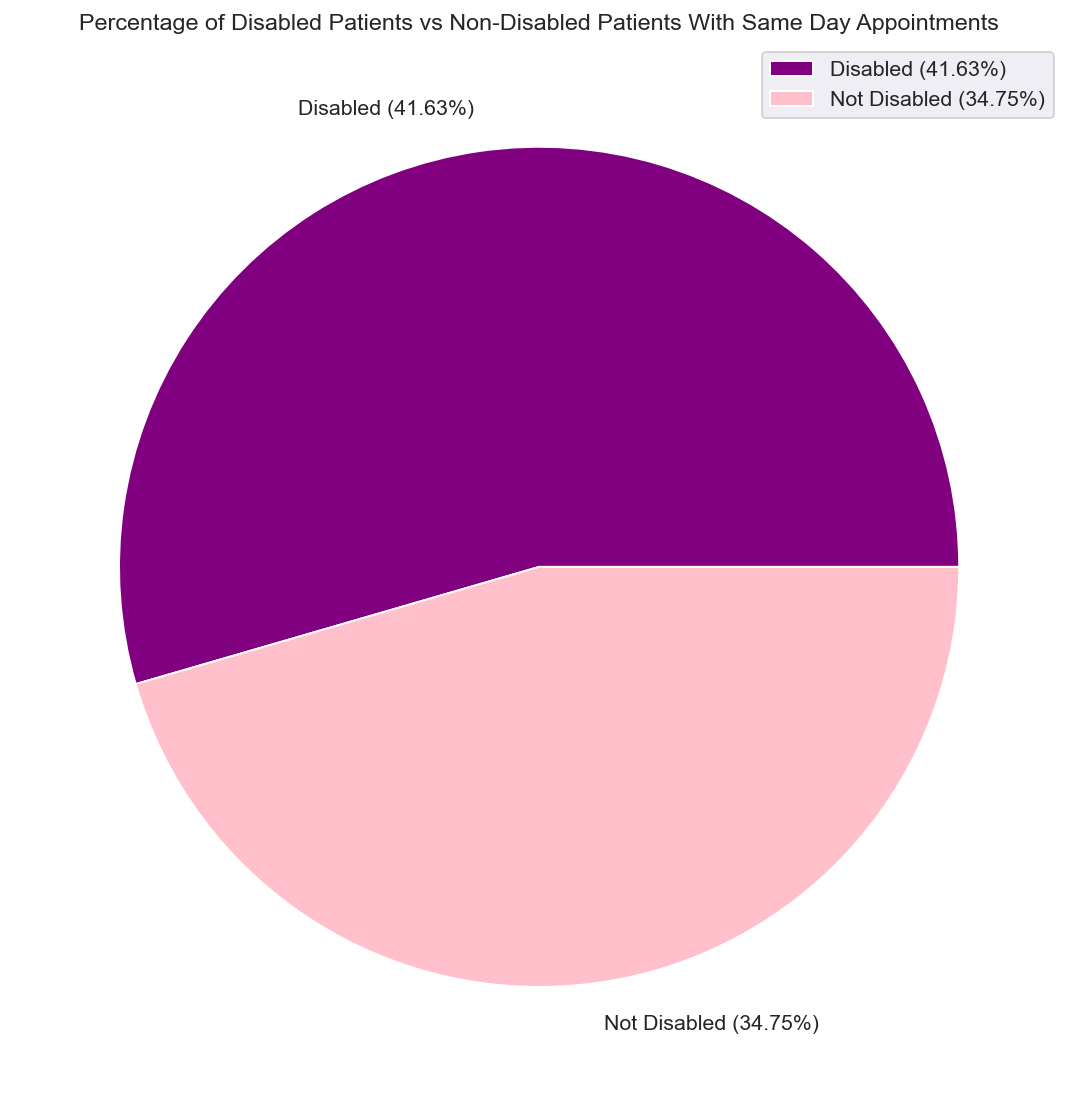

In [148]:
x = [f'Disabled ({round(disab_same_day, 2)}%)', f'Not Disabled ({round(not_disab_same_day, 2)}%)']
y = [disab_same_day, not_disab_same_day]
fig = plt.figure(figsize=(8, 8))
fig.set_dpi(140)
colors = ['purple', 'pink']
plt.pie(y, labels=x, colors=colors)

plt.legend(x, loc='upper right')
plt.title('Percentage of Disabled Patients vs Non-Disabled Patients With Same Day Appointments')
plt.axis=('equal')
plt.tight_layout()
plt.show()

Disabled patients received more same day appointments than disabled patients. 
Next, I will compare the the number of days elapsed to rate of shows and no-shows in both segments. 

In [63]:
# proportion of disabled people who got same day appointments and showed
d_same_day_showed = proportion_calc(len(df[disabled][showed][same_day]), len(df[disabled][showed]))
d_same_day_showed
# 46% of the disabled patients who showed up had same day appointments

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/3803346803.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d_same_day_showed = proportion_calc(len(df[disabled][showed][same_day]), len(df[disabled][showed]))


46.94656488549619

In [64]:
d_within_7_days_showed = proportion_calc(len(df[disabled][showed][_1_to_7_days]), len(df[disabled][showed]))
d_within_7_days_showed
# 29% of disabled patients who showed up had appointments between 2 to 7 days from booking day. 

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/910586030.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d_within_7_days_showed = proportion_calc(len(df[disabled][showed][_1_to_7_days]), len(df[disabled][showed]))


29.825517993456923

In [65]:
d_over_7_days_showed = proportion_calc(len(df[disabled][showed][_more_than_7_days]), len(df[disabled][showed]))
d_over_7_days_showed
# 23% of disabled patients who showed up had more than 7 days between booking day and appointment day. 

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/3121977602.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d_over_7_days_showed = proportion_calc(len(df[disabled][showed][_more_than_7_days]), len(df[disabled][showed]))


23.227917121046893

In [66]:
nd_same_day_showed = proportion_calc(len(df[not_disabled][showed][same_day]), len(df[not_disabled][showed]))
nd_same_day_showed
#41% of the non-disabled patients who showed up had same day appointments

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/2994697391.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_same_day_showed = proportion_calc(len(df[not_disabled][showed][same_day]), len(df[not_disabled][showed]))


41.575010998680156

In [67]:
nd_within_7_days_showed = proportion_calc(len(df[not_disabled][showed][_1_to_7_days]), len(df[not_disabled][showed]))
nd_within_7_days_showed
# 27% of non-disabled patients who showed up got appointments 2 to 7 days after booking.

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/2926596493.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_within_7_days_showed = proportion_calc(len(df[not_disabled][showed][_1_to_7_days]), len(df[not_disabled][showed]))


27.63100006946535

In [68]:
nd_over_7_days_showed = proportion_calc(len(df[not_disabled][showed][_more_than_7_days]), len(df[not_disabled][showed]))
nd_over_7_days_showed
# 30% of non-disabled patients who showed up got appointments more than 7 days after booking.

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/2399247136.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_over_7_days_showed = proportion_calc(len(df[not_disabled][showed][_more_than_7_days]), len(df[not_disabled][showed]))


30.793988931854493

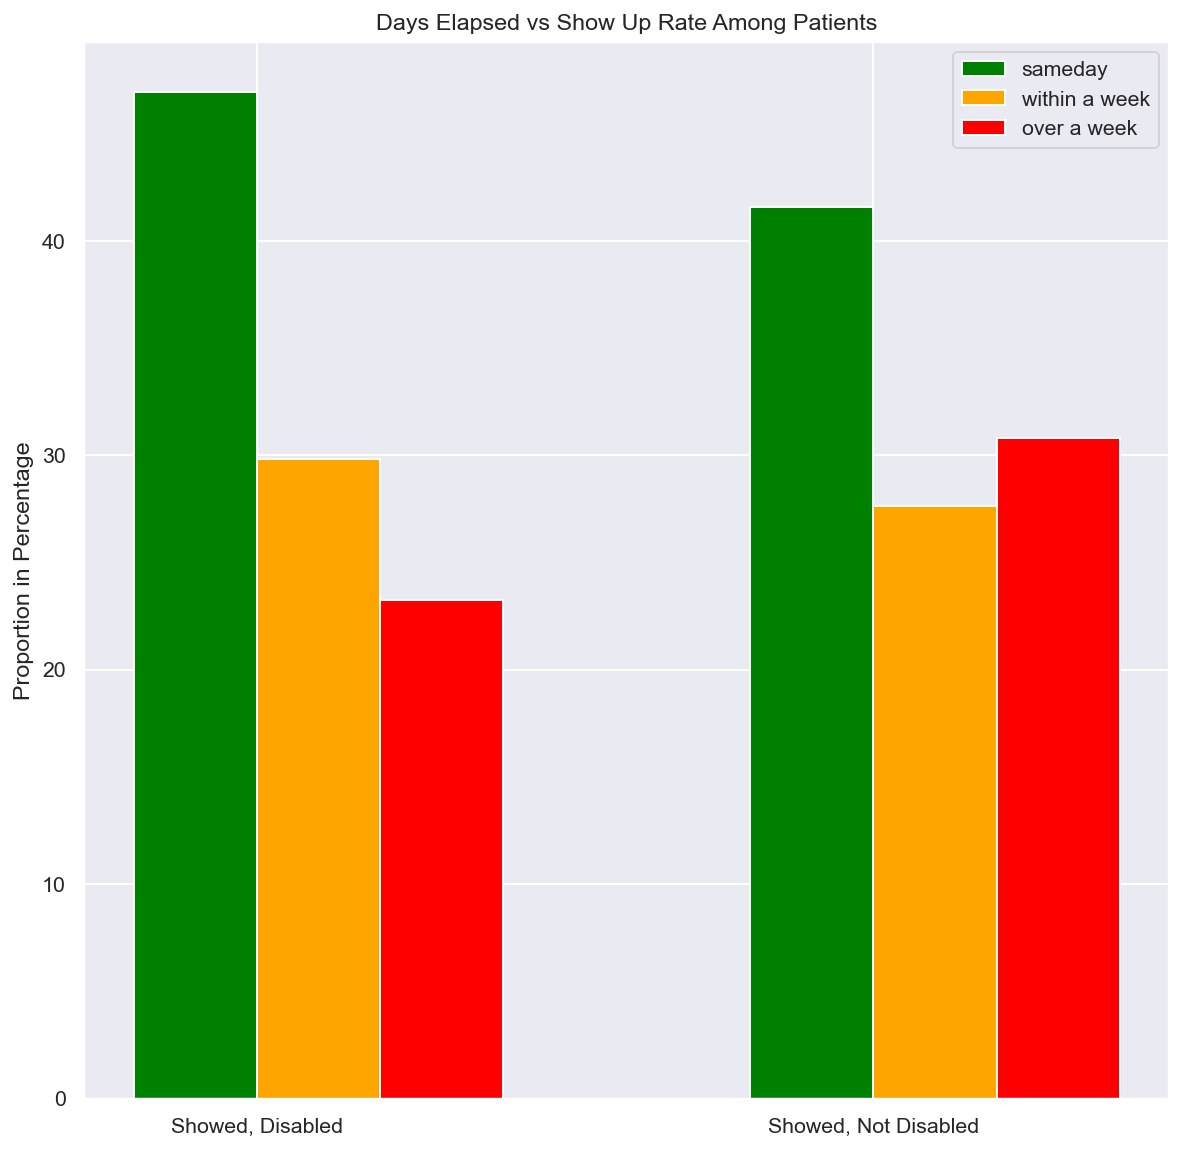

In [154]:
labels = ['Showed, Disabled', 'Showed, Not Disabled']
same_day_bar = [d_same_day_showed, nd_same_day_showed]
one_wk_bar = [d_within_7_days_showed, nd_within_7_days_showed]
over_one_wk_bar = [d_over_7_days_showed, nd_over_7_days_showed]


label_loc = np.arange(len(labels))
width = 0.2
rects1 = plt.bar(label_loc - width/2, same_day_bar, color=['green'], alpha=1, label='sameday', width=width)
rects2 = plt.bar(label_loc + width/2, one_wk_bar, color=['orange'], alpha=1, label='within a week', width=width)
rects3 = plt.bar(label_loc + width*1.5, over_one_wk_bar, color=['red'], alpha=1, label='over a week', width=width)

# title and labels
plt.ylabel('Proportion in Percentage')

plt.title('Days Elapsed vs Show Up Rate Among Patients')

plt.xticks(label_loc, labels)

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["figure.dpi"] = 70
# legend
plt.legend();


In both segments, the highest rate of show up was recorded among patients who got same day appointments. 
Disabled patients least showed up when their appointments were more than one week after booking, while non-disabled patients least showed up if their appointments are fell within 2 to 7 days of booking. 

Limitations to this observation: There are a myriad of other factors that may influence days elapsed such as how critical a condition a patient is in, the kind of medical consultation the patient requires, and distance of the patient's location to the hospital. These might not necessarily be related to a patient's disability or lack thereof. 

However, it is reasonable that disabled patients receive higher priority over non-disabled patients due to for instance mobility issues and an overall more fragile state of health. 

Regardless, increasing the number of same day appointments is likely to increase show up rate. 

Next, I will be evaluating number of days elapsed between booking and appointment among no-shows for both the disabled and non-disabled segments. 

In [70]:

d_same_day_no_show = proportion_calc(len(df[disabled][no_show][same_day]), len(df[disabled][no_show]))
d_same_day_no_show
# 17% of disabled patients who did not show up had same day appointments.

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/1943648880.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d_same_day_no_show = proportion_calc(len(df[disabled][no_show][same_day]), len(df[disabled][no_show]))


17.530864197530864

In [71]:
d_within_7_days_no_show = proportion_calc(len(df[disabled][no_show][_1_to_7_days]),len(df[disabled][no_show]))
d_within_7_days_no_show
# 40% of disabled patients who did not show got appointments between 2 to 7 days from booking. 

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/1417466155.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d_within_7_days_no_show = proportion_calc(len(df[disabled][no_show][_1_to_7_days]),len(df[disabled][no_show]))


40.74074074074074

In [72]:
d_over_7_days_no_show = proportion_calc(len(df[disabled][no_show][_more_than_7_days]), len(df[disabled][no_show]))
d_over_7_days_no_show
# 41% of disabled patients who did not show up had appointments over 7 days from booking. 

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/1784238404.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d_over_7_days_no_show = proportion_calc(len(df[disabled][no_show][_more_than_7_days]), len(df[disabled][no_show]))


41.7283950617284

In [73]:
nd_same_day_no_show = proportion_calc(len(df[not_disabled][no_show][same_day]),
len(df[not_disabled][no_show]))
nd_same_day_no_show
# 7% of non-disabled patients who did not show up had same day appointments. 

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/1187767652.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_same_day_no_show = proportion_calc(len(df[not_disabled][no_show][same_day]),
/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/1187767652.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[not_disabled][no_show]))


7.8552193162627235

In [74]:
nd_within_7_days_no_show = proportion_calc(len(df[not_disabled][no_show][_1_to_7_days]),
                len(df[not_disabled][no_show]))
nd_within_7_days_no_show
# 34% of non-disabled patients who did not show up had appointments between 2 to 7 days from booking.

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/91969146.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_within_7_days_no_show = proportion_calc(len(df[not_disabled][no_show][_1_to_7_days]),
/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/91969146.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[not_disabled][no_show]))


34.720890958053765

In [75]:
nd_over_7_days_no_show = proportion_calc = proportion_calc(len(df[not_disabled][no_show][_more_than_7_days]),
             len(df[not_disabled][no_show]))
nd_over_7_days_no_show
# 57% of non-disabled patients who did not show up had appointments more than 7 days from booking. 

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/135272966.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_over_7_days_no_show = proportion_calc = proportion_calc(len(df[not_disabled][no_show][_more_than_7_days]),
/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/135272966.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[not_disabled][no_show]))


57.42388972568351

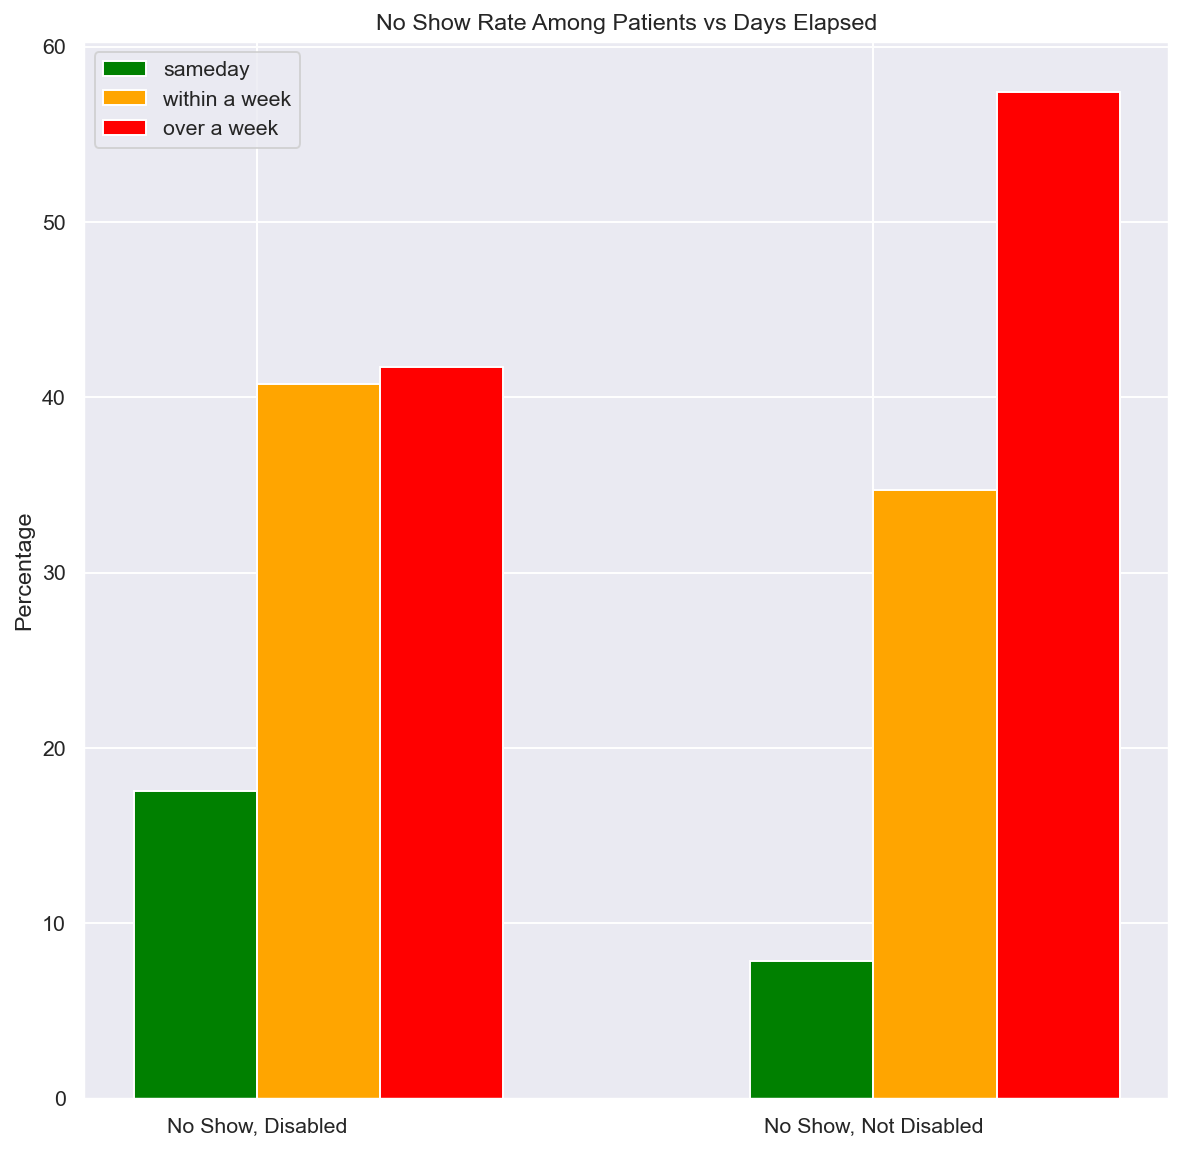

In [134]:
labels = ['No Show, Disabled', 'No Show, Not Disabled']
same_day_bar = [d_same_day_no_show, nd_same_day_no_show]
one_wk_bar = [d_within_7_days_no_show, nd_within_7_days_no_show]
over_one_wk_bar = [d_over_7_days_no_show, nd_over_7_days_no_show]


label_loc = np.arange(len(labels))
width = 0.2
rects1 = plt.bar(label_loc - width/2, same_day_bar, color=['green'], alpha=1, label='sameday', width=width)
rects2 = plt.bar(label_loc + width/2, one_wk_bar, color=['orange'], alpha=1, label='within a week', width=width)
rects3 = plt.bar(label_loc + width*1.5, over_one_wk_bar, color=['red'], alpha=1, label='over a week', width=width)

# title and labels
plt.ylabel('Percentage')
plt.title('No Show Rate Among Patients vs Days Elapsed')

plt.xticks(label_loc, labels)

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["figure.dpi"] = 140
# legend
plt.grid(True)
plt.legend();

Similar to the preceding analysis on days_elapsed vs show up rate, patients in both segments who got same day appointments were least likely to miss their appointments. 
Non-disabled patients who got same day appointments were the least likely to miss their appointments, which is an indicator that if non-disabled patients were to get more same day appointments, their show up rate would increase and no show rate would reduce. 

For disabled patients, these analyses appear to provide a reason as to why their show up rate was more than that of non-disabled patients as they got more same day appointments and it can be observed that same day appointments have a positive effect on show up rate and a negative effect on no-show. 

### Question 2: Does being on bolsa familia influence alcoholism?

In [77]:
# create masks for alcoholism
alc = df.alcoholism == True
no_alc = df.alcoholism == False

In [78]:
# checking the distribution of alcoholism 
df_alc = (len(df[alc])/len(df)) * 100
df_no_alc = (len(df[no_alc])/len(df)) * 100

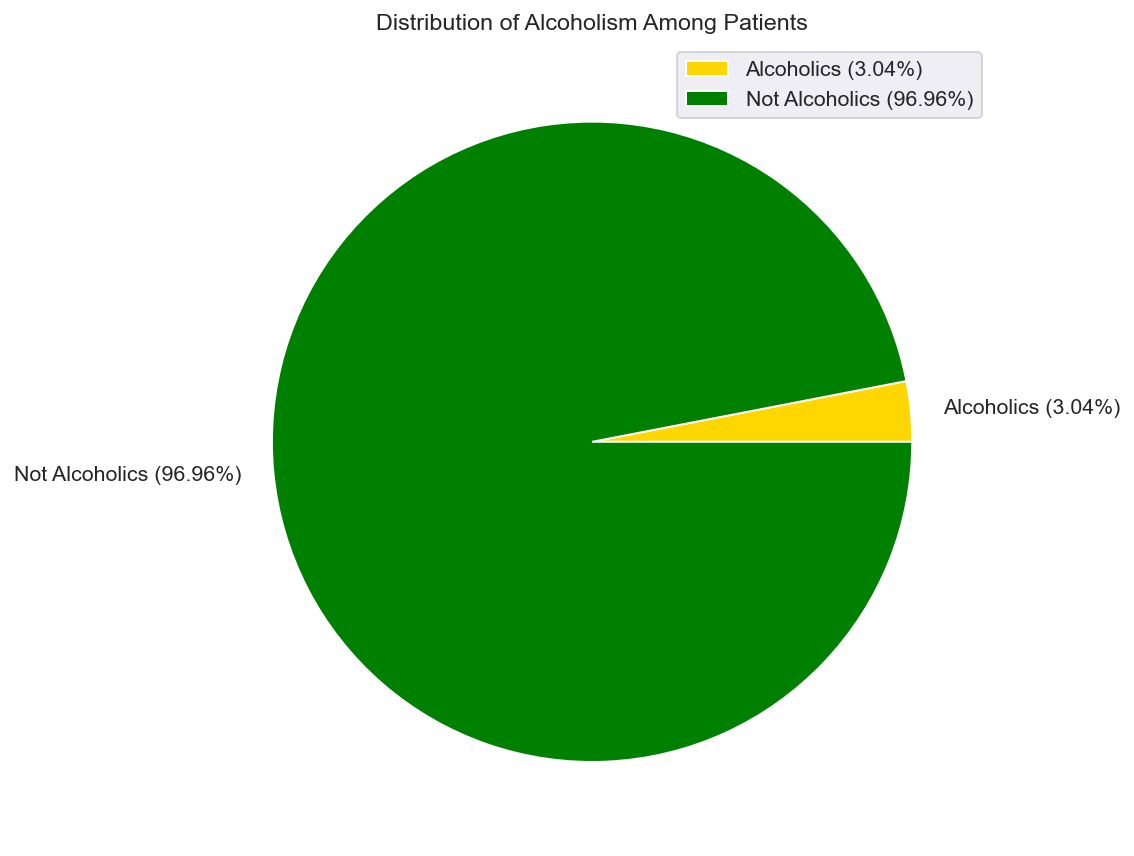

In [155]:
x = [f'Alcoholics ({round(df_alc, 2)}%)', f'Not Alcoholics ({round(df_no_alc, 2)}%)']
y = [df_alc, df_no_alc]
fig = plt.figure(figsize=(8, 8))
fig.set_dpi(140)
colors = ['gold', 'green']
plt.pie(y, labels=x, colors=colors)

plt.legend(x, loc='upper right')
plt.title('Distribution of Alcoholism Among Patients')
plt.axis=('equal')
plt.tight_layout()
plt.show()

In [80]:
# create masks for on bolsa
bls = df.on_bolsa == True
no_bls = df.on_bolsa == False

In [81]:
# checking distribution of bolsa participation among patients
df_bls = (len(df[bls])/len(df)) * 100
df_no_bls = (len(df[no_bls])/len(df)) * 100

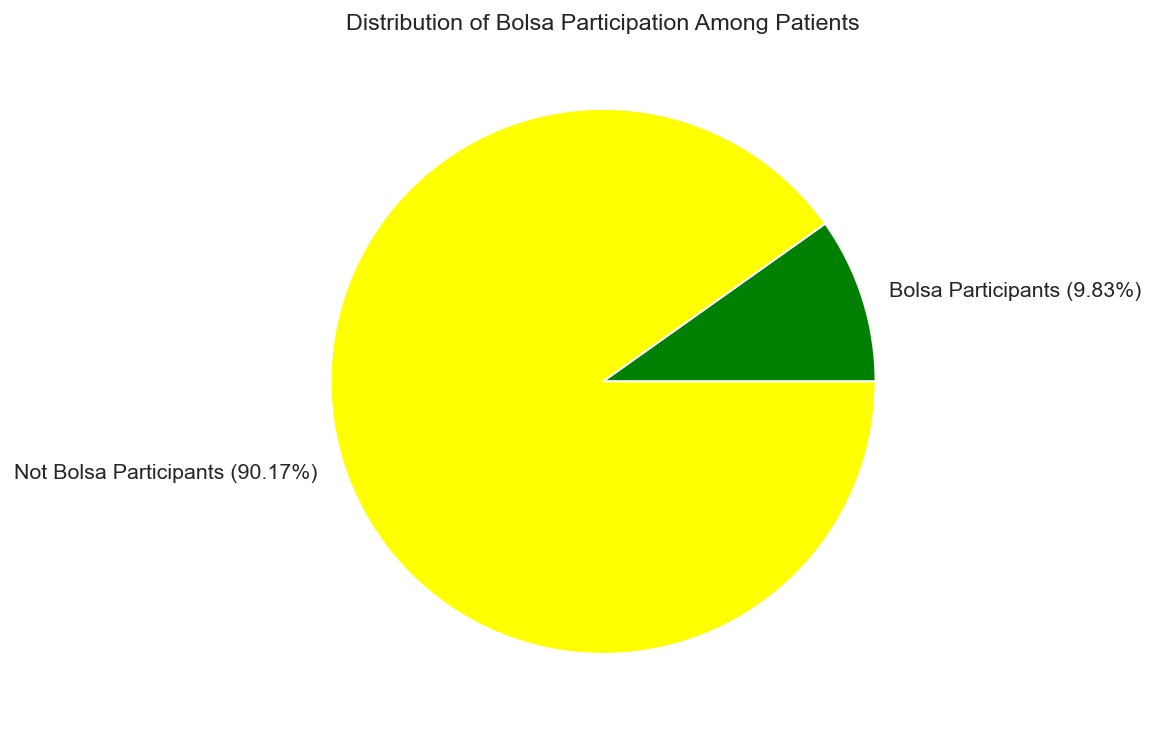

In [156]:
x = [f'Bolsa Participants ({round(df_bls, 2)}%)', f'Not Bolsa Participants ({round(df_no_bls, 2)}%)']
y = [df_bls, df_no_bls]
fig = plt.figure(figsize=(8, 8))
fig.set_dpi(140)
colors = ['green', 'yellow']
plt.pie(y, labels=x, colors=colors)

plt.title('Distribution of Bolsa Participation Among Patients')
plt.axis=('equal')
plt.tight_layout()
plt.show()

In [83]:
# proportion of bolsa participants who are alcoholics
num = len(df[bls][alc])
denom = len(df[bls])
bls_alc = (num/denom) * 100
bls_alc


/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/3339454840.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num = len(df[bls][alc])


4.8614308074762915

In [84]:
# proportion of non-bolsa participants who are alcoholics
num = len(df[no_bls][alc])
denom = len(df[no_bls])
no_bls_alc = (num/denom) * 100
no_bls_alc

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/1449513850.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num = len(df[no_bls][alc])


2.841633136332166

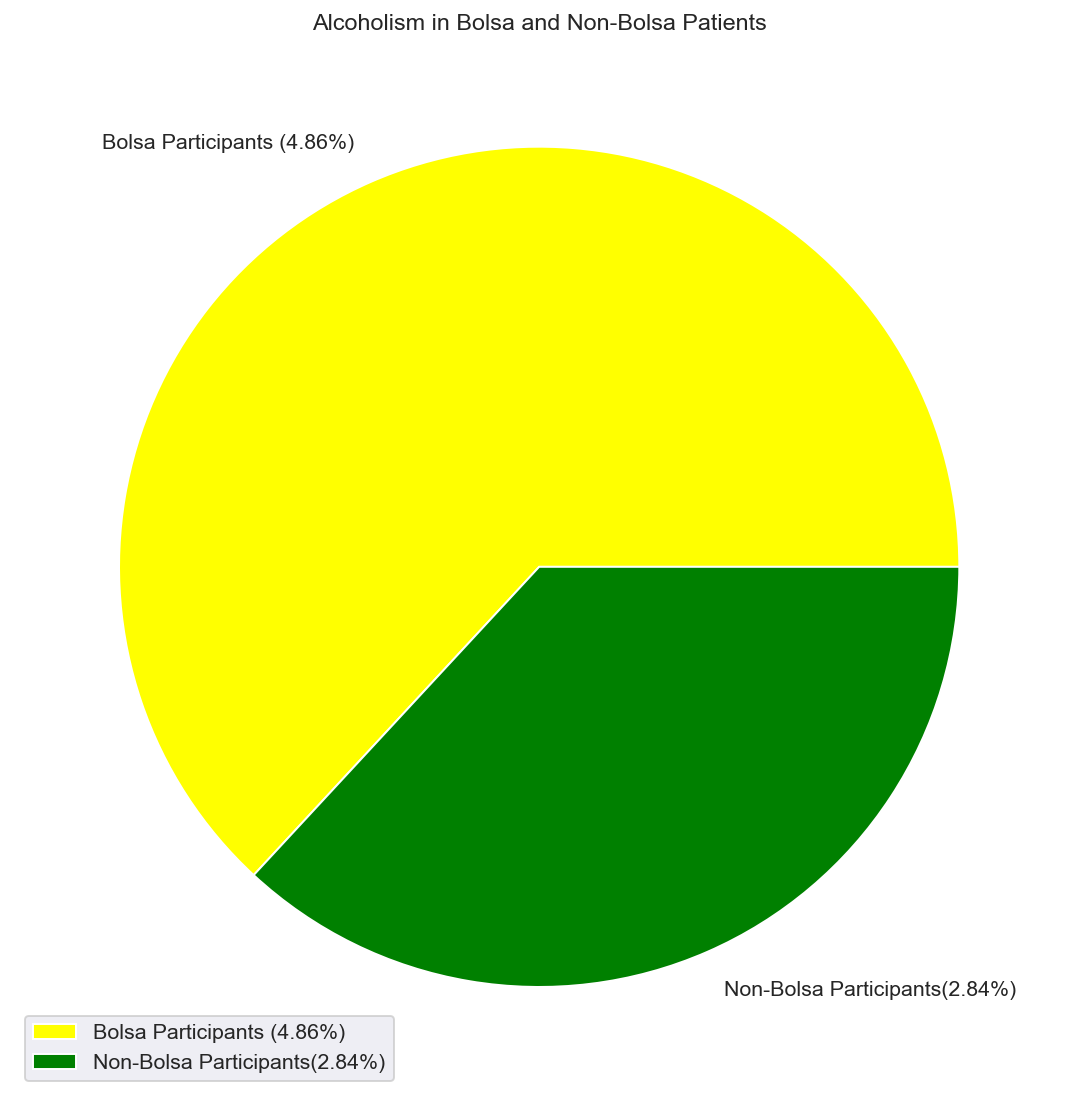

In [157]:
x = [f'Bolsa Participants ({round(bls_alc, 2)}%)', f'Non-Bolsa Participants({round(no_bls_alc, 2)}%)']
y = [bls_alc, no_bls_alc]
fig = plt.figure(figsize=(8, 8))
fig.set_dpi(140)
colors = ['yellow', 'green']
plt.pie(y, labels=x, colors=colors)

plt.legend(x, loc='lower left')
plt.title('Alcoholism in Bolsa and Non-Bolsa Patients')
plt.axis=('equal')
plt.tight_layout()
plt.grid(True)
plt.show()

Alcoholism rate is almost two times higher among patients that are on the bolsa familia program compared to non-bolsa patients.

### Question 3: Does being on bolsa influence turn up rate?

In [86]:
# rate of show up vs bolsa
bls_show = len(df[bls][showed])/len(df[bls]) * 100
bls_show
# 76% of patients on bolsa showed up

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/2761273023.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bls_show = len(df[bls][showed])/len(df[bls]) * 100


76.26369579228432

In [87]:
no_bls_show= len(df[no_bls][showed])/len(df[no_bls]) * 100
no_bls_show
# 80% of patient not on bolsa showed up

/var/folders/30/r8vxylg52bb5jg13txm2j4nh0000gn/T/ipykernel_18830/1888162700.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_bls_show= len(df[no_bls][showed])/len(df[no_bls]) * 100


80.19686738041962

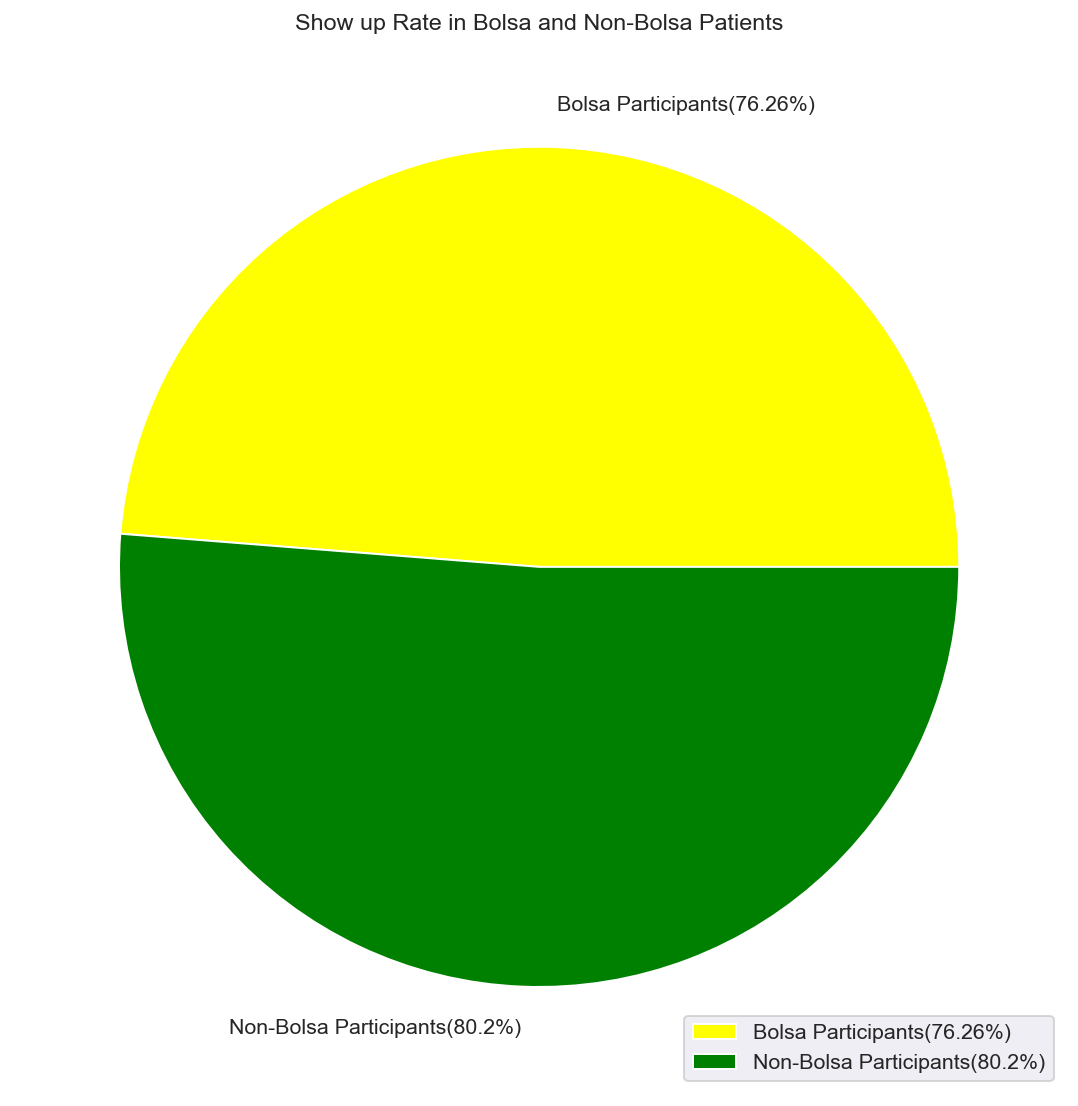

In [158]:
x = [f'Bolsa Participants({round(bls_show, 2)}%)', f'Non-Bolsa Participants({round(no_bls_show, 2)}%)']
y = [bls_show, no_bls_show]
fig = plt.figure(figsize=(8, 8))
fig.set_dpi(140)
colors = ['yellow', 'green']
plt.pie(y, labels=x, colors=colors)

plt.legend(x, loc='lower right')
plt.title('Show up Rate in Bolsa and Non-Bolsa Patients')
plt.axis=('equal')
plt.tight_layout()
plt.show()

The rate of attendance among Bolsa participants is 4% less than patients who are not on the programme. 

<a id='conclusions'></a>
## Conclusions

On question 1, disabled patients, despite representing only 2% of the patients, had a higher show up rate than non-disabled patients . Receiving SMS did not contribute to this increase, but having a same day appointment significantly increased both disabled and non-disabled patients show up rate. It is likely that increasing the availability of same day appointments will increase the show-up rate among patients. 

On question 2, patients who were participants of the Bolsa Familia programme had a higher rate of alcoholism than those who were not. This can however be due to other socioeconomic factors such as lower income as the programme is after all for the poorest families in Brazil. It cannot be conclusively stated that the programme in itself made patients more prone to alcoholism. 

Finally, patients who were on the Bolsa Familia programme had a lower rate of show up compared to patients who weren't on the programme. However, this could also be attributed to other factors such as distance between hospital and patients' residence, urgency of medical attention and ailment types. 

> **Limitations**
Some of the limitations of my analysis include:
1. Limited data: The dataset contains records of only 1 month, which is quite a limited duration to predict lifestyle patterns of such a large sample. Having data that covers 1 - 5 years will provide for better understanding of trends and patterns. 

2. Type of Sample: With my second question, I tried to find out whether being on the Bolsa Familia programme increased alcoholism rate and affected show up rate. However, the dataset only contains people who who are already in need of medical attention. Most likely there will be a higher rate of health issues such as alcoholism in the sample. To better answer this question, a random sample will be needed which will include people who are not in need of medical assistance. 

In [89]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])